In [1]:
import pandas as pd
import numpy as np

from constants import numeric_columns as num_cols


# df1 = pd.read_csv('dm1_dataset_2425_imdb/train.csv')
df = pd.read_csv('pp_train.csv')

df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_War,is_Horror,is_Animation,fill_runtimeMinutes,is_from_Oceania,is_from_North America,is_from_South America,is_from_Asia,is_from_Africa,is_from_Europe
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,0,21,...,0,0,1,40.0,0,1,0,0,0,0
1,Looping,6,1982,NaN,NaN,0.0,11,1,0,1,...,0,0,0,28.0,0,0,0,0,0,1
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,0,24,...,0,0,0,90.0,0,0,0,0,0,1
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0,0,0,31.0,0,1,0,0,0,0
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,0,0,80.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,6,1942,NaN,NaN,0.0,73,4,0,45,...,0,0,0,90.0,0,0,0,0,0,1
16427,Haar Jeet,5,1990,NaN,NaN,0.0,15,2,0,22,...,0,0,0,90.0,0,0,0,1,0,0
16428,Kotigobba 3,6,2021,NaN,140.0,0.0,2560,39,3,129,...,0,0,0,140.0,0,0,0,1,0,0
16429,Ator l'invincibile,4,1982,NaN,NaN,0.0,3011,52,1,53,...,0,0,0,90.0,0,0,0,0,0,1


In [2]:
numeric_cols = [
    # 'titleType',
    'rating',
    'startYear',
    # 'totalImages',
    'totalCredits',
    'numRegions',
    'numVotes',
    'totalMedia',
    'runtimeMinutes',
    # 'fill_runtimeMinutes',
    
    # genres
    # 'is_Documentary', 'is_History', 'is_Adventure',
    # 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance',
    # 'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir',
    # 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime',
    # 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show',
    # 'is_Drama', 'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
    
    # most variance
    # 'is_Documentary',
    # 'is_Adventure',
    # 'is_Comedy',
    # 'is_Reality-TV',
    # 'is_News',
    # 'is_Action',
    # 'is_Crime',
    # 'is_Short',
    # 'is_Talk-Show',
    # 'is_Drama',
    # 'is_Animation',

    # these are made out of mostly 0s
    # 'awardNominationsExcludeWins', 'awardWins',
    # 'totalNominations', 'runtimeMinutes',
    # 'userReviewsTotal', 'criticReviewsTotal',
    # 'totalVideos',
    # 'totalNominations',

    # booleans
    # 'canHaveEpisodes', 
    # 'isAdult',

    # cut
    # 'totalMedia',
]


to_log = [
    # 'totalImages',
    'totalCredits',
    'numRegions',
    'numVotes', 
    'totalMedia',
    'runtimeMinutes',
    # 'fill_runtimeMinutes',

    # these are made out of mostly 0s
    # 'awardNominationsExcludeWins', 'awardWins',
    # 'totalNominations', 'runtimeMinutes',
    # 'userReviewsTotal', 'criticReviewsTotal',
    # 'totalVideos',

    # booleans
    # 'canHaveEpisodes', 'isAdult',

    # cut
    # 'rating', 'startYear', 'totalMedia'
]

In [4]:
df['totalMedia'] = df['totalImages'] + df['totalVideos']

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.patches as mpatches


# Select numerical features
# numeric_cols = df.select_dtypes(include=['number']).columns

# decision to drop na: first try, the classes mantain decent
# representation while not having to replace na, possibly inserting
# errors
data = df[numeric_cols].dropna()

# transformation of some attributes -> log
# data['runtimeMinutes'] = np.log(data['runtimeMinutes'] + 1)
for feature in to_log:
    data[feature] = np.log(data[feature] + 1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Agglomerative Clustering
n_clusters = 4  # Adjust based on your dataset
clustering = AgglomerativeClustering(
    n_clusters=None, distance_threshold=0, linkage='ward')
model = clustering.fit(data_scaled)
# data['cluster'] = clustering.fit_predict(data_scaled)

# Plot clusters (PCA for visualization if data is high-dimensional)

In [16]:
data

,rating,startYear,totalCredits,numRegions,numVotes,totalMedia,runtimeMinutes
4,8,2020,3.871201,3.496508,9.662625,5.857933,4.394449
5,9,1995,0.000000,0.693147,2.708050,0.693147,3.555348
6,8,1995,4.709530,0.693147,4.574711,1.791759,3.828641
8,8,1996,1.098612,0.693147,2.564949,0.693147,2.564949
10,9,2017,1.791759,0.693147,3.526361,0.693147,3.806662
...,...,...,...,...,...,...,...
16420,8,2019,4.127134,0.693147,3.555348,4.882802,3.761200
16422,6,1954,2.772589,0.693147,3.555348,2.944439,2.079442
16423,7,1965,2.890372,1.386294,2.397895,1.791759,4.709530
16424,8,1968,3.761200,0.693147,3.433987,0.693147,4.304065


In [24]:
from scipy.cluster.hierarchy import fcluster

merge_distances = np.sort(model.distances_)

counts = np.zeros(model.children_.shape[0])

n_samples = len(model.labels_)

for i, (left, right) in enumerate(model.children_):
    count_left = 1 if left < n_samples else counts[left - n_samples]
    count_right = 1 if right < n_samples else counts[right - n_samples]
    counts[i] = count_left + count_right

linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
    ).astype(float)

distance_at_5th_cluster = merge_distances[
    (len(model.children_) - n_clusters)
]

labels = fcluster(
    linkage_matrix,
    t=distance_at_5th_cluster,
    criterion='distance'
)

In [8]:
cluster_label_mapping = {i: labels[i] for i in range(n_samples)}

# Step 3: Assign labels to newly formed clusters
for i, (c1, c2, _, _) in enumerate(linkage_matrix):
    new_cluster_idx = i + n_samples  # Index of new cluster
    cluster_label_mapping[new_cluster_idx] = cluster_label_mapping[int(c1)]

In [10]:
custom_colors = ['#7f7f7f', 'tab:blue', 'tab:orange', 'tab:green',
    'tab:red']

def _color_func(linkage_matrix, cluster_labels):
    # mapping = {}
    # for i, dist in enumerate(linkage_matrix[:, 2].astype(int)):
    #     # Get colors based on cluster labels
    #     if dist < distance_at_5th_cluster:
    #         mapping[i + n_samples] = custom_colors[cluster_labels[i]]
    
    cluster_label_mapping = {i: labels[i] for i in range(n_samples)}
    
    for i, (c1, _, _, _) in enumerate(linkage_matrix):
        new_cluster_idx = i + n_samples
        cluster_label_mapping[new_cluster_idx] = cluster_label_mapping[int(c1)]  # Use first child cluster's label

    mapping = {}
    for i, dist in enumerate(linkage_matrix[:, 2]):
        cluster_id = i + n_samples
        mapping[cluster_id] = (
            'tab:gray' if dist > distance_at_5th_cluster
            else custom_colors[cluster_label_mapping[cluster_id]]
        )
    
    def _map_color(k):
        return mapping.get(k, 'tab:gray')  # Default to grey if not mapped

    return _map_color

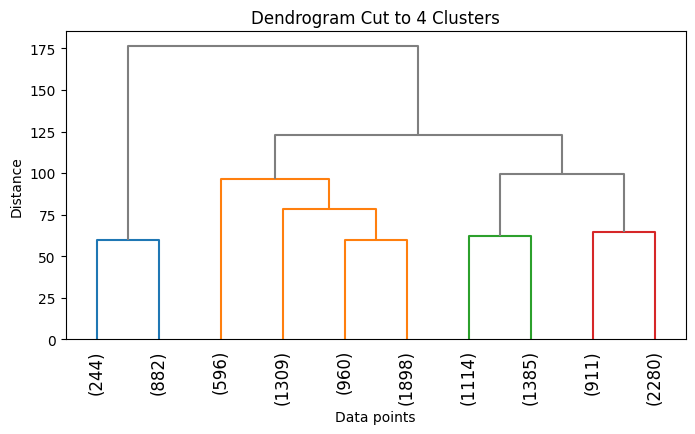

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 4: Compute the distance at which the 4th cluster is formed
# When there are 4 clusters left, the previous merge distance gives that threshold
distance_at_4th_cluster = linkage_matrix[-(n_clusters - 2), 2]



# Step 4: Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(
    linkage_matrix,
    color_threshold=distance_at_4th_cluster,
    link_color_func=_color_func(linkage_matrix, labels),
    truncate_mode='lastp',
    p=10,
)
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.title(f"Dendrogram Cut to {n_clusters} Clusters")
# plt.yscale('log')
# plt.grid(axis='both')
plt.show()

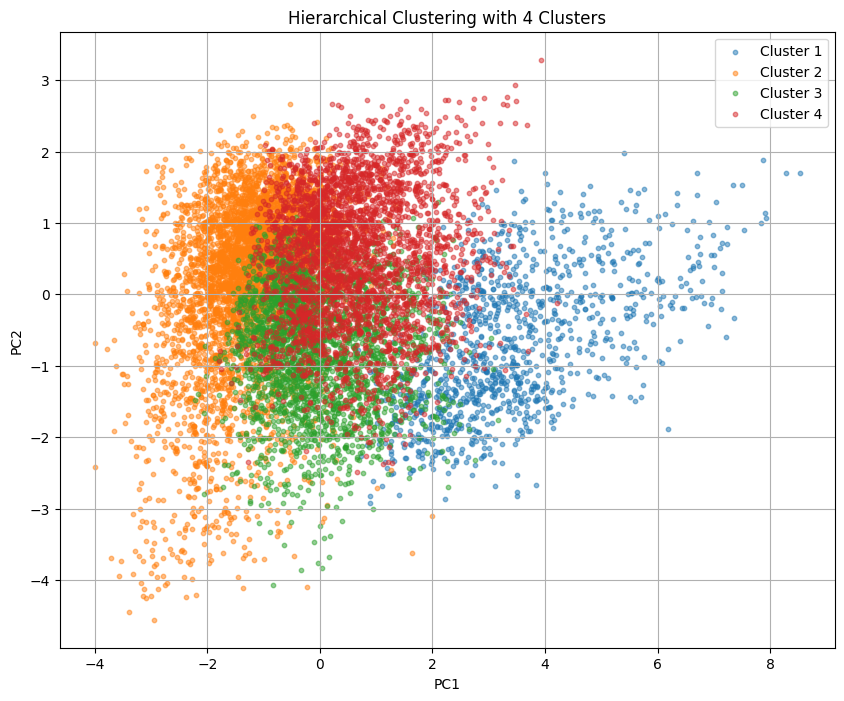

In [40]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42, n_components=4)
data_pca = pca.fit_transform(data_scaled)

# Step 3: Create the scatter plot with colormap
plt.figure(figsize=(10, 8))
for i in range(1, n_clusters + 1):
    plt.scatter(data_pca[labels == i, 0], data_pca[labels == i, 1],
                color=custom_colors[i], label=f'Cluster {i}',
                alpha=0.5, s=10,)
# scatter = plt.scatter(
#     data_pca[:, 0], data_pca[:, 1], c=labels,
#     # cmap=colors,
#     alpha=0.5, s=10,
#     # cmap='tab20',
# )  # Color by clusters

# Add labels and title
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.title(f"Hierarchical Clustering with {n_clusters} Clusters")

plt.show()

In [ ]:
# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

In [19]:
def get_linkage_matrix_clustering(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.labels_[1:], counts]
    ).astype(float)

    return linkage_matrix

In [20]:
linkage_matrix = get_linkage_matrix_clustering(clustering)

In [29]:
data['cluster'] = labels
df = df.dropna(axis=0, subset=numeric_cols)
df['cluster'] = labels

In [30]:
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_Animation,fill_runtimeMinutes,is_from_Oceania,is_from_North America,is_from_South America,is_from_Asia,is_from_Africa,is_from_Europe,totalMedia,cluster
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,80.0,0,0,0,1,0,0,349,1
5,Lightdance,9,1995,NaN,34.0,0.0,14,1,0,0,...,0,34.0,0,1,0,0,0,0,1,2
6,"Kiss, Kiss Bang, Bang",8,1995,NaN,45.0,0.0,96,5,0,110,...,0,45.0,0,1,0,0,0,0,5,4
8,Estrela de Oito Pontas,8,1996,NaN,12.0,2.0,12,1,0,2,...,1,12.0,0,0,1,0,0,0,1,2
10,JJBA Mangabridged: Phantom Blood 2 of 2,9,2017,NaN,44.0,0.0,33,1,0,5,...,0,44.0,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,C'est Noël,8,2019,NaN,42.0,0.0,34,131,0,61,...,0,42.0,0,1,0,0,0,0,131,4
16422,"Four Wheels, No Brakes",6,1954,NaN,7.0,0.0,34,18,0,15,...,1,7.0,0,1,0,0,0,0,18,2
16423,Hia waal rijal,7,1965,NaN,110.0,0.0,10,5,0,17,...,0,110.0,0,0,0,0,1,0,5,3
16424,Pineapple Rose,8,1968,NaN,73.0,0.0,30,1,0,42,...,0,73.0,0,1,0,0,0,0,1,2


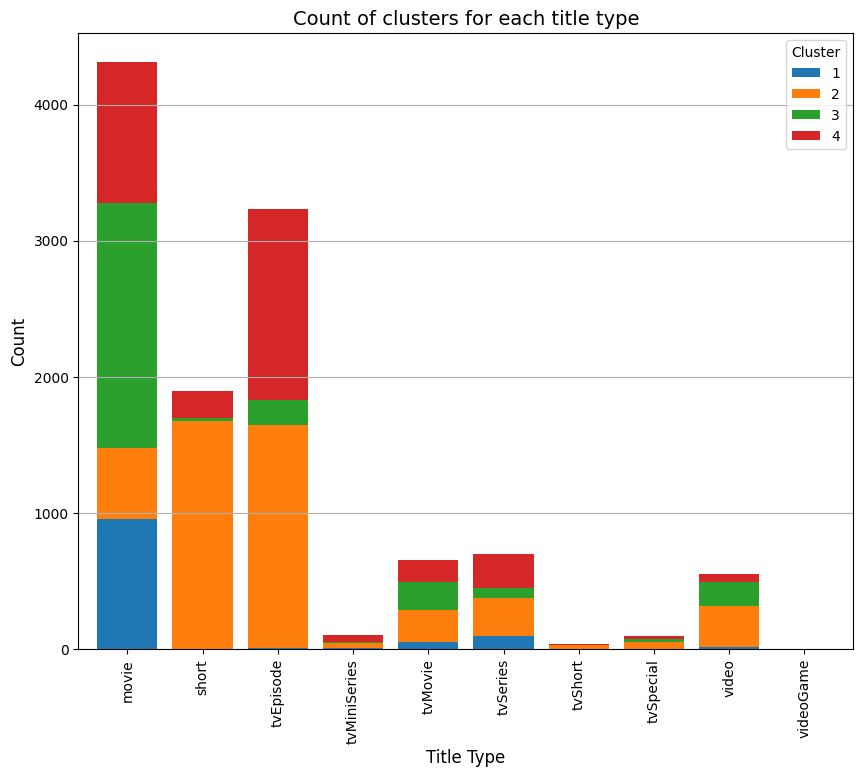

In [35]:
plot_df = df.groupby(
    ['titleType', 'cluster',]).count()['rating'].unstack(fill_value=0)


# plot_df = plot_df.groupby(
#     ['cluster', 'titleType',])['rating'].sum().unstack(fill_value=0)
plot_df['sum'] = plot_df.sum(axis= 1)
# plot_df = plot_df.sort_values(
#     by= 'sum', ascending= False)#.drop(columns= 'sum')

# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Title Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count of clusters for each title type', fontsize=14)

# Add legend
ax.legend(title='Cluster')

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

plt.grid(axis= 'y')

# plt.yscale('log')

# Display the plot
plt.show()

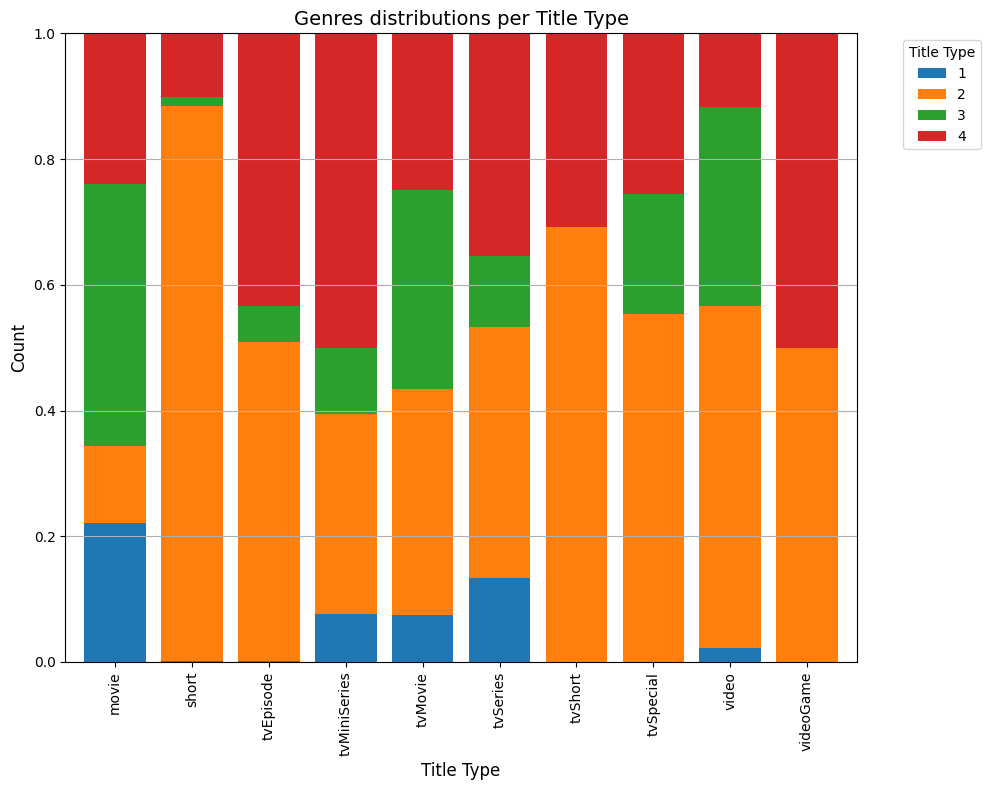

In [36]:
for col in plot_df.columns:
    if col != 'sum':
        plot_df[col] = plot_df[col]/plot_df['sum']

# # Display the plot
# plt.show()
# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Title Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Genres distributions per Title Type', fontsize=14)

# Add legend outside the plot
ax.legend(title='Title Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis limit
ax.set_ylim(top=1)

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

# Add gridlines for the y-axis
plt.grid(axis='y')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

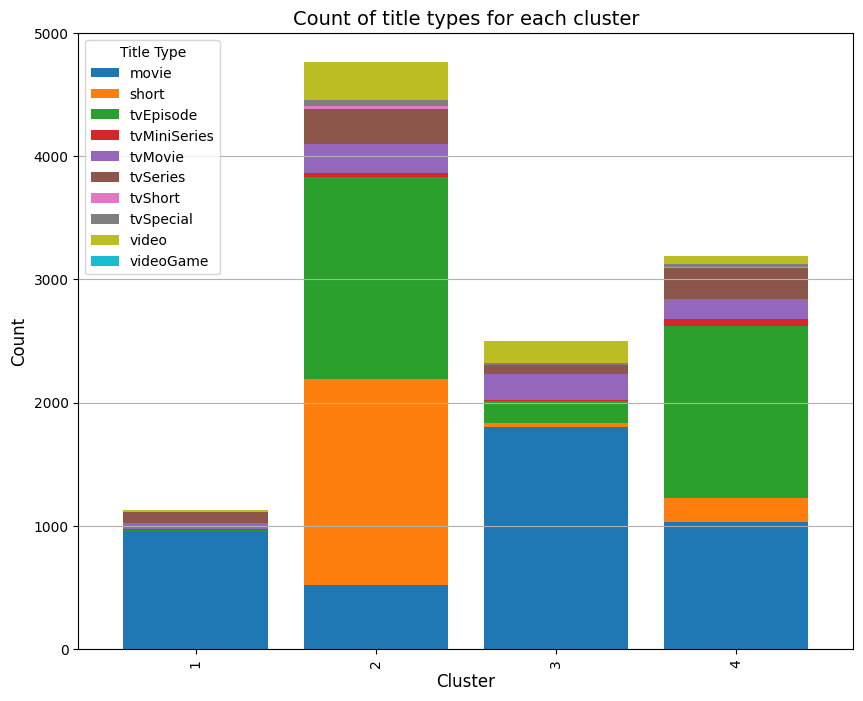

In [37]:
plot_df = df.groupby(
    ['cluster', 'titleType',]).count()['rating'].unstack(fill_value=0)


# plot_df = plot_df.groupby(
#     ['cluster', 'titleType',])['rating'].sum().unstack(fill_value=0)
plot_df['sum'] = plot_df.sum(axis= 1)
# plot_df = plot_df.sort_values(
#     by= 'sum', ascending= False)#.drop(columns= 'sum')

# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count of title types for each cluster', fontsize=14)

# Add legend
ax.legend(title='Title Type')

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

plt.grid(axis= 'y')

# plt.yscale('log')

# Display the plot
plt.show()

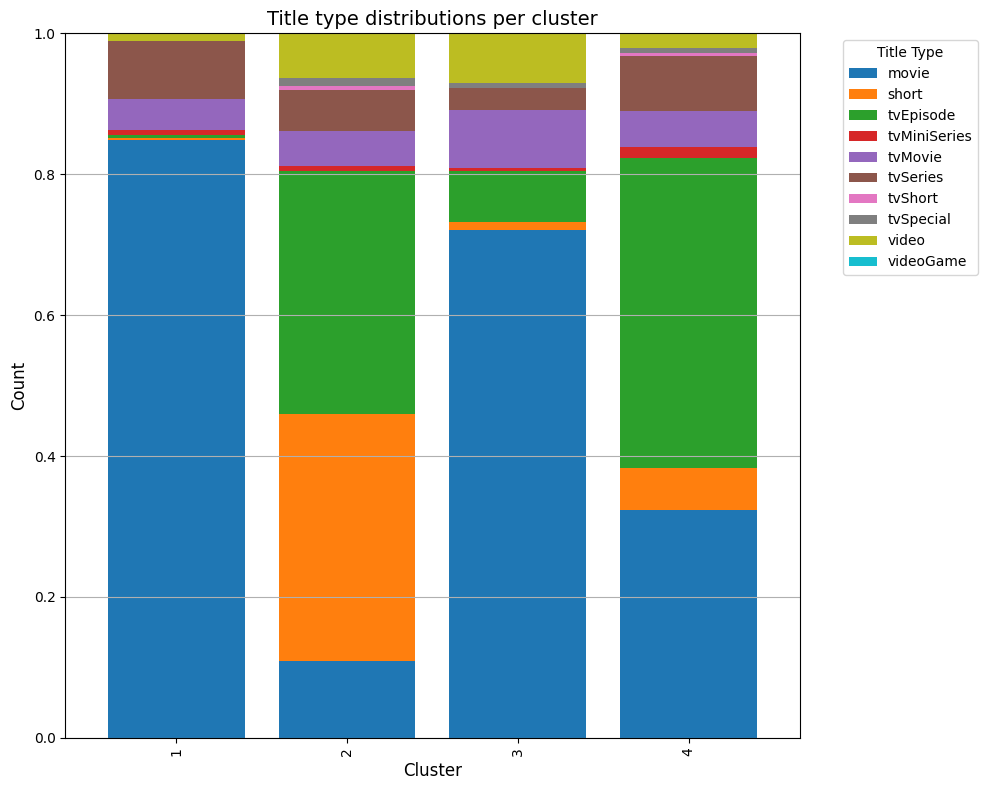

In [38]:
for col in plot_df.columns:
    if col != 'sum':
        plot_df[col] = plot_df[col]/plot_df['sum']

# # Display the plot
# plt.show()
# Step 2: Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through the genres to plot the stacked bars
plot_df.drop(columns= 'sum').plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Title type distributions per cluster', fontsize=14)

# Add legend outside the plot
ax.legend(title='Title Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis limit
ax.set_ylim(top=1)

# Rotate x-tick labels to make them more readable
plt.xticks(rotation=90)

# Add gridlines for the y-axis
plt.grid(axis='y')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:

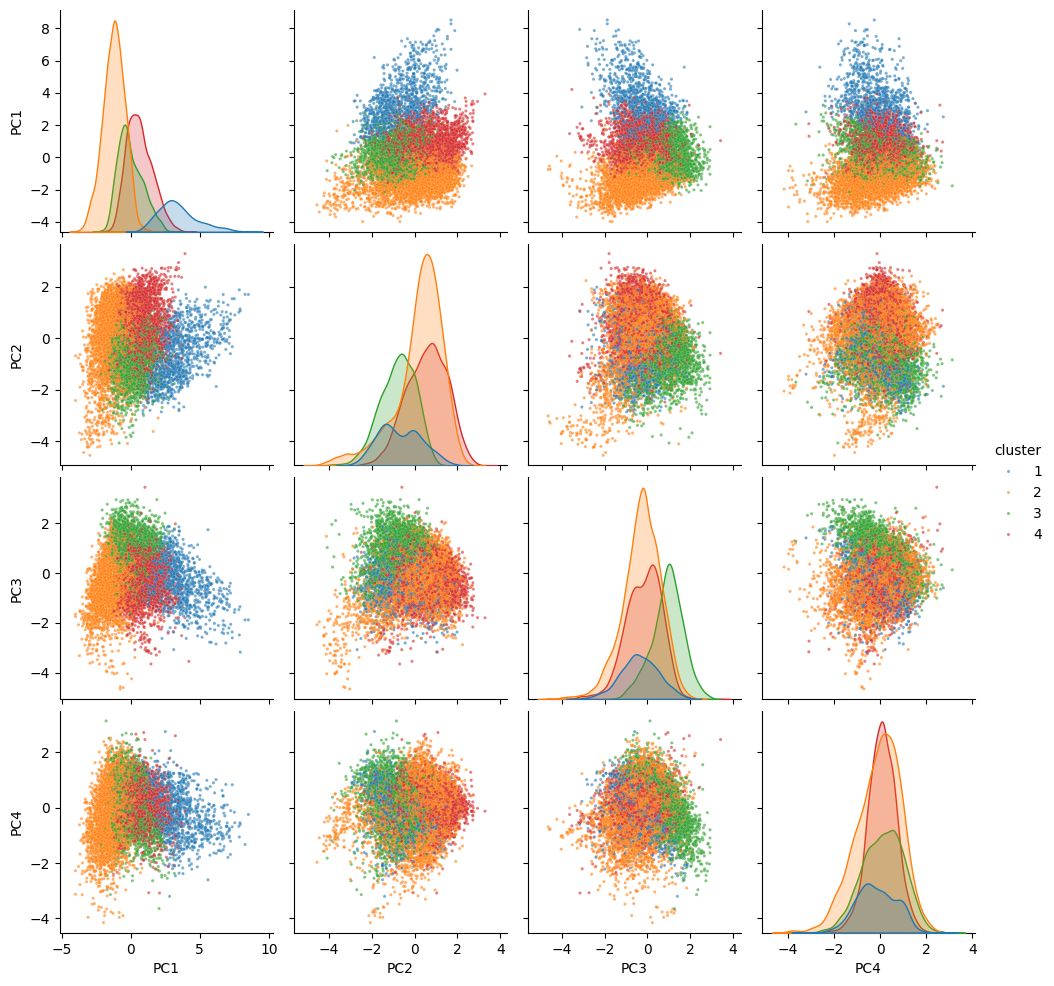

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_hierarchical(data_pca):
    # Create a DataFrame with principal components
    pca_columns = [f"PC{i+1}" for i in range(len(data_pca[0]))]
    pca_df = pd.DataFrame(data_pca, columns=pca_columns)
    
    pca_df['cluster'] = labels
    
    # Visualize with Seaborn pairplot
    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", "PC3", "PC4"],
        hue="cluster",
        diag_kind="kde",
        palette="tab10",
        plot_kws={"s": 5, "alpha": 0.6, 'linewidth':0.1},
    )
    
    plt.show()


plot_pca_hierarchical(data_pca)

In [49]:
pca.explained_variance_ratio_

array([0.390723  , 0.18551458, 0.13766055, 0.10757932])

In [53]:
sum = 0
for var_ratio in pca.explained_variance_ratio_:
    sum+=var_ratio
    
sum

0.8214774439016301

In [43]:
colors = [
    'tab:blue', 'tab:orange', 'tab:green',
    'tab:red', 'tab:purple', 'tab:brown',
    'tab:pink', 'tab:gray', 'tab:olive',
    'tab:cyan'
]

color_mapping = {i: colors[i] for i in range(len(colors))}

scatter_colors = [color_mapping[label] for label in data['cluster']]

In [45]:
loadings = pca.components_.T  # Shape (num_features, num_components)

# Scale loadings for better visualization
scaling_factor = 5  # Adjust for visibility
loadings_scaled = loadings * scaling_factor

In [46]:
import plotly.graph_objects as go
from matplotlib.colors import to_rgb

# Define colors for clusters
# cluster_colors = ["red", "green", "blue"]
# data_pca["color"] = data_pca["cluster"].map(lambda c: cluster_colors[c])

pca_columns = [f"PC{i+1}" for i in range(len(data_pca[0]))]

pca_df = pd.DataFrame(data_pca, columns=pca_columns)
    
pca_df['cluster'] = data['cluster']

pca_df['color'] = [to_rgb(color_name) for color_name in scatter_colors]

# Create scatter plot trace
scatter_trace = go.Scatter3d(
    x=pca_df['PC1'], y=pca_df['PC2'], z=pca_df['PC3'],
    mode="markers",
    marker=dict(
        size=1, color=pca_df['color'], opacity=0.5, 
        # line=dict(width=0.5, color="black")
    ),
    # text=data_pca.index,  # Hover info
    name="Data Points"
)

# Create loading vectors as arrows
arrow_traces = []
for i in range(len(loadings_scaled)):
    arrow_traces.append(
        go.Scatter3d(
            x=[0, loadings_scaled[i, 0]],
            y=[0, loadings_scaled[i, 1]],
            z=[0, loadings_scaled[i, 2]],
            mode="lines+text",
            line=dict(color="black", width=3),
            text=[None, data.columns[i]],  # Label at the end of arrow
            textposition="top center",
            name=data.columns[i]
        )
    )

# Combine traces
fig = go.Figure(data=[scatter_trace] + arrow_traces)

# Customize layout
fig.update_layout(
    title="Interactive 3D PCA Scatter Plot with Loadings",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show plot
fig.show()